# Data Exploration- Community area wise pickups of a particular year

This code generates the community area-wise maps of total rides for each quarter of a particular year

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
!pip install geopandas
import geopandas as gpd
!pip install Pysal
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1i0UUM5sp2isJvppjFm1WXBzbEbArSP4x'}) 
downloaded.GetContentFile('apr_13.csv')  

In [0]:
df_1=pd.read_csv('apr_13.csv')

In [0]:
downloaded = drive.CreateFile({'id':'1QwE-ZAt3HsbiG8jl7WKaT0ODPwLwl6F5'}) 
downloaded.GetContentFile('may_13.csv')  

In [0]:
df_2=pd.read_csv('may_13.csv')

In [0]:
downloaded = drive.CreateFile({'id':'1Z-7J06J75YXH3zG238Y74tsVIW5pwWim'}) 
downloaded.GetContentFile('june_13.csv')  

In [0]:
df_3 = pd.read_csv('june_13.csv')

In [0]:
df = pd.concat([df_1,df_2,df_3])

In [0]:
downloaded = drive.CreateFile({'id':'1Vf6A9dHQgSSre_rM6-RBHo0fSy0fEOB_'}) 
downloaded.GetContentFile('Bound.geojson') 

Data cleaning only performed for the necessary columns so as to reduce computation time as much as possible

In [0]:
df = df[pd.isnull(df['Trip Start Timestamp']) == 0]
df = df[pd.isnull(df['Trip End Timestamp']) == 0]
df = df[pd.isnull(df['Taxi ID']) == 0] 
df = df[pd.isnull(df['Pickup Community Area']) == 0] 
df = df[pd.isnull(df['Dropoff Community Area']) == 0] 
df = df[df['Trip Miles'] < 500]


#df['start timestamp'] = df['Trip Start Timestamp'].apply(parser.parse)
#df['end timestamp'] = df['Trip End Timestamp'].apply(parser.parse)
#df['DayName'] = df['end timestamp'].dt.weekday_name
df['Fare'] = df['Fare'].str.strip('$').apply(float)
#df['Tips'] = df['Tips'].str.strip('$').apply(float)
#df['Tolls'] = df['Tolls'].str.strip('$').apply(float)
#df['Extras'] = df['Extras'].str.strip('$').apply(float)
#df['Trip Total'] = df['Trip Total'].str.strip('$').apply(float)

#df.loc[df['Payment Type'] == 'Cash', 'Tips'] = 0.0

#df.loc[df['Payment Type'] == 'Cash', 'Payment Type'] = 1
#df.loc[df['Payment Type'] == 'Credit Card', 'Payment Type'] = 0
#df.loc[df['Payment Type'] == 'Unknown', 'Payment Type'] = 2
#df.loc[df['Payment Type'] == 'Dispute', 'Payment Type'] = 3
#df.loc[df['Payment Type'] == 'No Charge', 'Payment Type'] = 4
#df.loc[df['Payment Type'] == 'Prcard', 'Payment Type'] = 5

In [0]:
df = df[(df['Fare']>2) & (df['Fare']<1000)]  #Assuming min fare = 2.5 and discurding fares more than 1000
df = df[df['Trip Seconds'] <= (12*60*60)]

del df['Trip ID']
del df['Trip Start Timestamp']
del df['Trip End Timestamp']
del df['Pickup O\'Hare Community Area']
del df['Pickup Centroid Location']
df.iloc[0]

In [0]:
df = df.drop(df.columns[[9]], axis=1)
df = df.drop(df.columns[[20]], axis=1)

#Generation of community area-wise heatmaps

In [0]:
df['count'] = 1
capick = df.pivot_table(values='count', index='Pickup Community Area', aggfunc=np.sum)
capick.columns=['count']
capick.index.names = ['area_num_1']
capick.reset_index(level=0, inplace=True)
capick.area_num_1 = capick.area_num_1.astype(int)

In [0]:
pickup_merge = ca.merge(capick, on='area_num_1', how='left')
pickup_merge.fillna(value = 0, inplace=True)

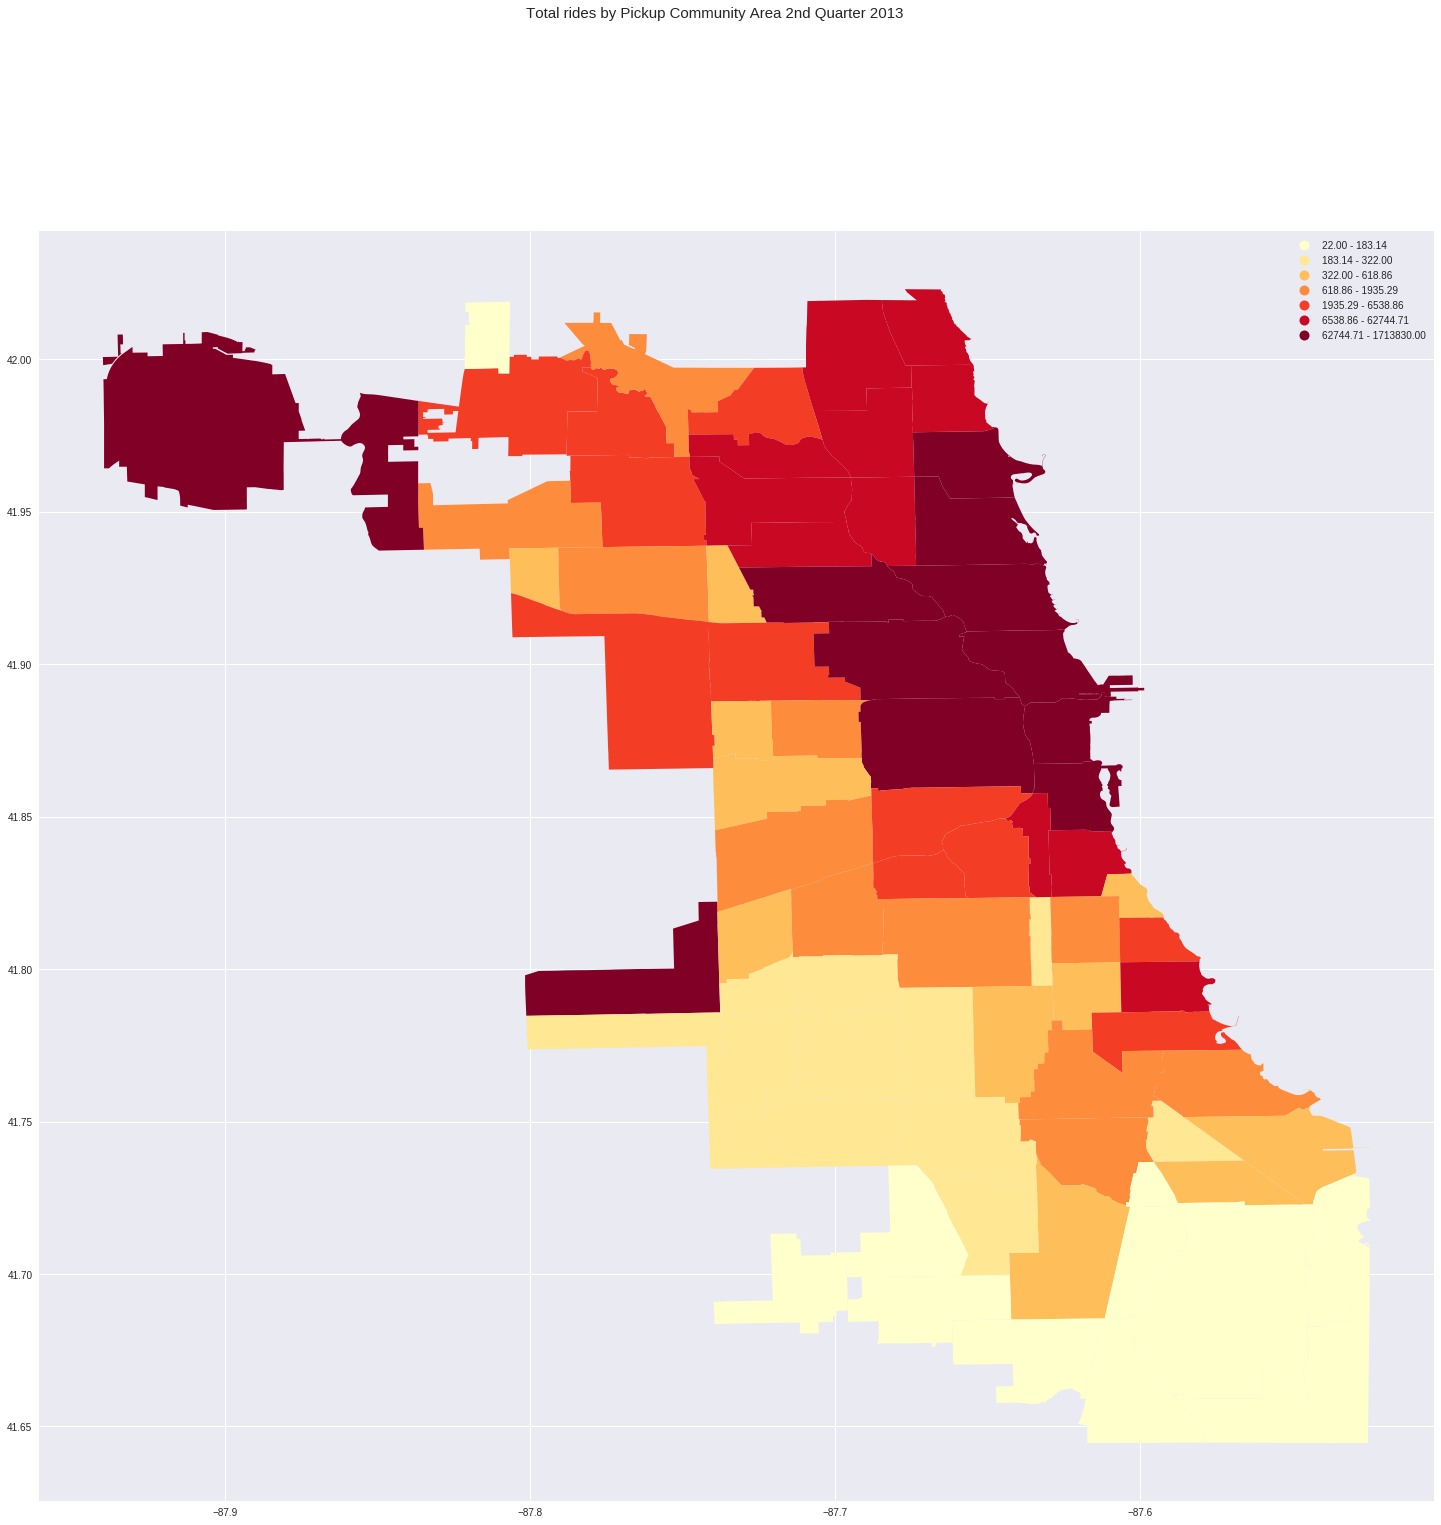

In [0]:
pickup_merge.plot(column='count', scheme='QUANTILES', k=7, cmap='YlOrRd', legend=True)
plt.suptitle('Total rides by Pickup Community Area 2nd Quarter 2013', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('Q2_2013.png', dpi =100)

Analysis repeated for the remaining quarters of 2013

In [0]:
downloaded = drive.CreateFile({'id':'1u-d53bU8Dv9OaPwhQ13f8GJJ8cCyLUFj'}) 
downloaded.GetContentFile('jul_13.csv')  

In [0]:
df_1 = pd.read_csv('jul_13.csv')

In [0]:
downloaded = drive.CreateFile({'id':'1UwdLKjBszcHpRV3R6BZwnQFmhl38oUBP'}) 
downloaded.GetContentFile('aug_13.csv')  

In [0]:
df_2 = pd.read_csv('aug_13.csv')

In [0]:
downloaded = drive.CreateFile({'id':'1yvYYI3BzAOfb-GOTczA26_VhFGpRY5sv'}) 
downloaded.GetContentFile('sept_13.csv')  

In [0]:
df_3 = pd.read_csv('sept_13.csv')

In [0]:
df = pd.concat([df_1,df_2,df_3])

In [0]:
df = df[pd.isnull(df['Trip Start Timestamp']) == 0]
df = df[pd.isnull(df['Trip End Timestamp']) == 0]
df = df[pd.isnull(df['Taxi ID']) == 0] 
df = df[pd.isnull(df['Pickup Community Area']) == 0] 
df = df[pd.isnull(df['Dropoff Community Area']) == 0] 
df = df[df['Trip Miles'] < 500]


#df['start timestamp'] = df['Trip Start Timestamp'].apply(parser.parse)
#df['end timestamp'] = df['Trip End Timestamp'].apply(parser.parse)
df['DayName'] = df['end timestamp'].dt.weekday_name
df['Fare'] = df['Fare'].str.strip('$').apply(float)
#df['Tips'] = df['Tips'].str.strip('$').apply(float)
#df['Tolls'] = df['Tolls'].str.strip('$').apply(float)
#df['Extras'] = df['Extras'].str.strip('$').apply(float)
#df['Trip Total'] = df['Trip Total'].str.strip('$').apply(float)

#df.loc[df['Payment Type'] == 'Cash', 'Tips'] = 0.0

#df.loc[df['Payment Type'] == 'Cash', 'Payment Type'] = 1
#df.loc[df['Payment Type'] == 'Credit Card', 'Payment Type'] = 0
#df.loc[df['Payment Type'] == 'Unknown', 'Payment Type'] = 2
#df.loc[df['Payment Type'] == 'Dispute', 'Payment Type'] = 3
#df.loc[df['Payment Type'] == 'No Charge', 'Payment Type'] = 4
#df.loc[df['Payment Type'] == 'Prcard', 'Payment Type'] = 5

In [0]:
df = df[(df['Fare']>2) & (df['Fare']<1000)]  #Assuming min fare = 2.5 and discurding fares more than 1000
df = df[df['Trip Seconds'] <= (12*60*60)]

del df['Trip ID']
del df['Trip Start Timestamp']
del df['Trip End Timestamp']
del df['Pickup O\'Hare Community Area']
del df['Pickup Centroid Location']
df.iloc[0]

In [0]:
df = df.drop(df.columns[[9]], axis=1)
df = df.drop(df.columns[[20]], axis=1)


In [0]:
df['count'] = 1
capick = df.pivot_table(values='count', index='Pickup Community Area', aggfunc=np.sum)
capick.columns=['count']
capick.index.names = ['area_num_1']
capick.reset_index(level=0, inplace=True)
capick.area_num_1 = capick.area_num_1.astype(int)

In [0]:
pickup_merge = ca.merge(capick, on='area_num_1', how='left')
pickup_merge.fillna(value = 0, inplace=True)

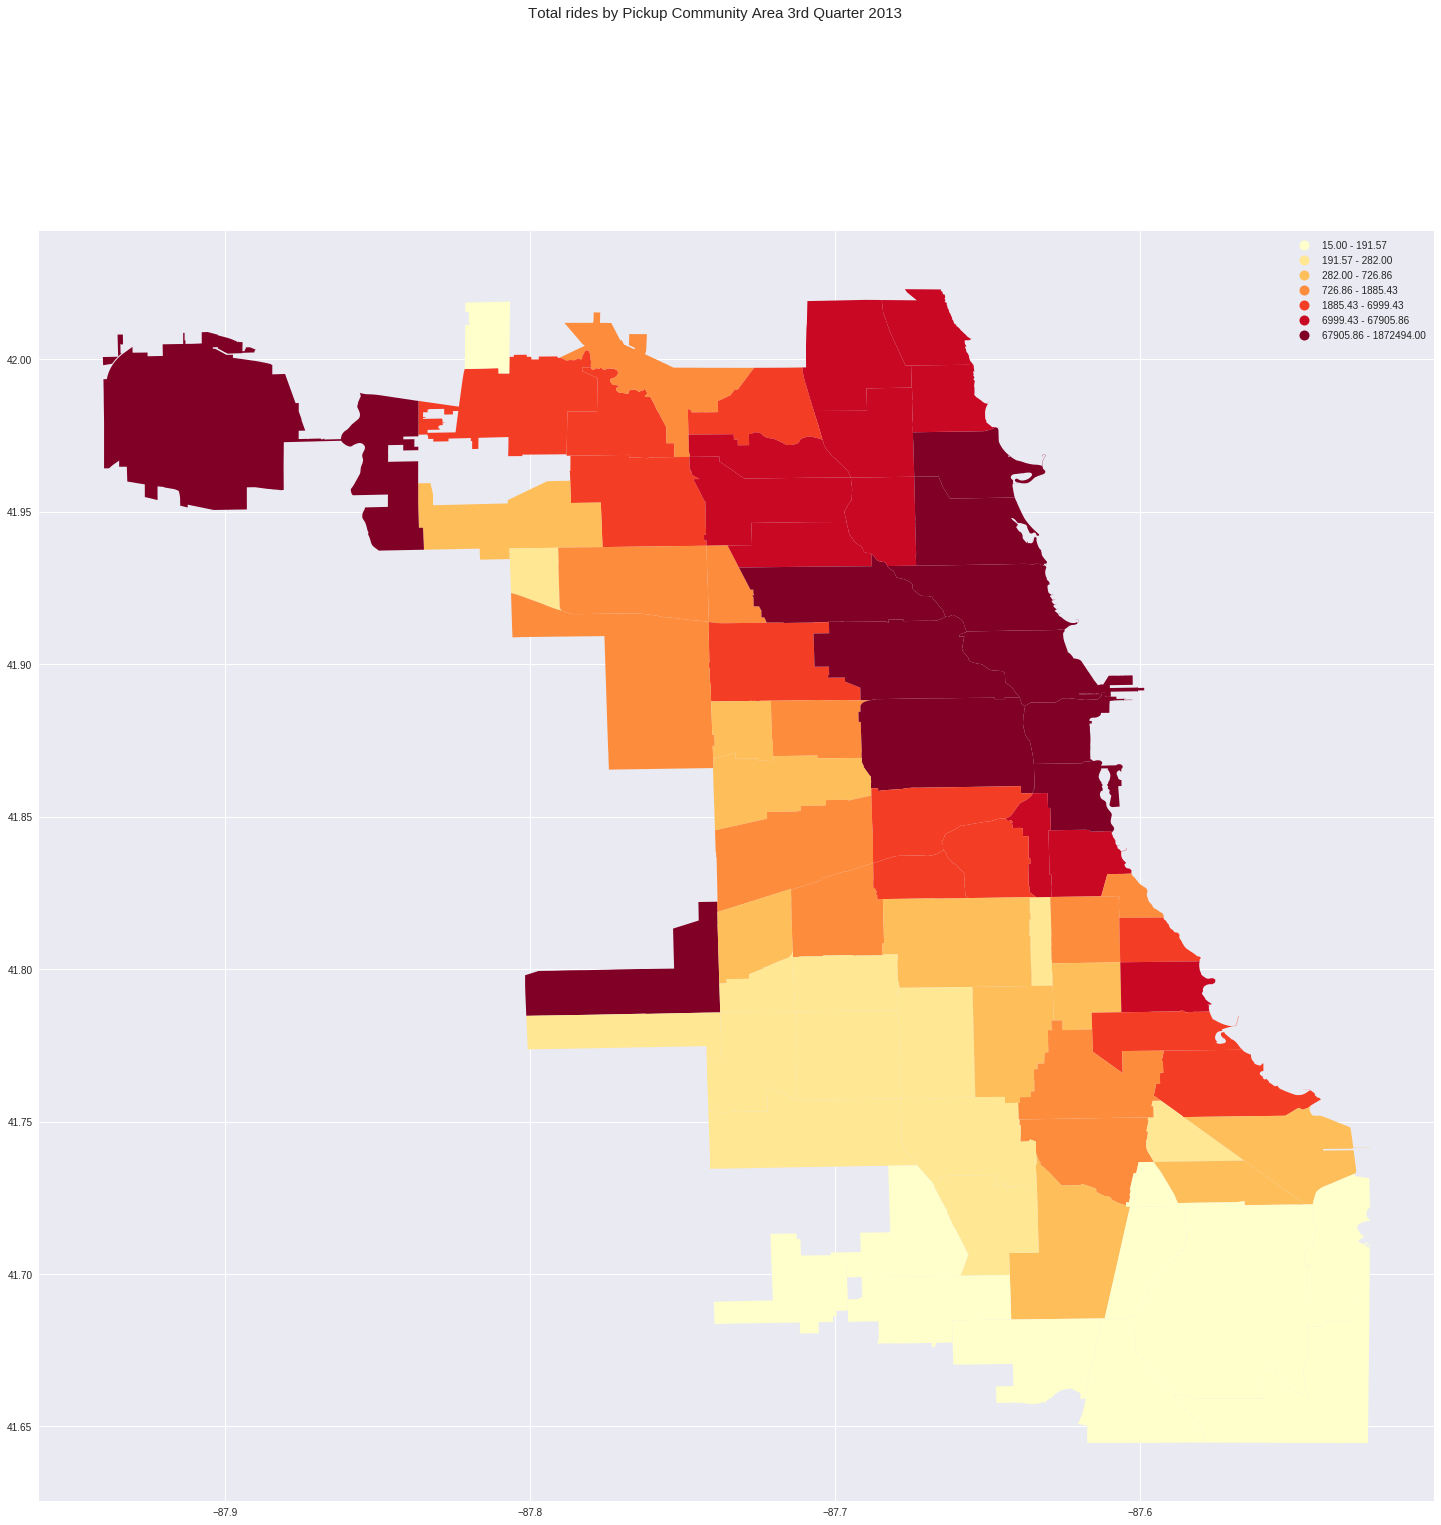

In [0]:
pickup_merge.plot(column='count', scheme='QUANTILES', k=7, cmap='YlOrRd', legend=True)
plt.suptitle('Total rides by Pickup Community Area 3rd Quarter 2013', size=15)
mpl.rcParams['figure.figsize'] = (25,25)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('Q3_2013.png', dpi =100)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
!pip install geopandas
import geopandas as gpd
!pip install Pysal

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1-d1TuH-IXibVGfBacrofWyBwrB-Fsb9H'}) 
downloaded.GetContentFile('oct_13.csv')  

In [0]:
df_1=pd.read_csv('oct_13.csv')

In [0]:
downloaded = drive.CreateFile({'id':'1G_D1e61OTJ4Bqmh9H4L3aWbEeNSd0EBY'}) 
downloaded.GetContentFile('nov_13.csv')  

In [0]:
df_2=pd.read_csv('nov_13.csv')

In [0]:
downloaded = drive.CreateFile({'id':'1sqRygNfUgbp5fwy00IgMTS7cLxWPX47K'}) 
downloaded.GetContentFile('dec_13.csv')  

In [0]:
df_3 = pd.read_csv('dec_13.csv')

In [0]:
df = pd.concat([df_1,df_2,df_3])

In [0]:
df = df[pd.isnull(df['Trip Start Timestamp']) == 0]
df = df[pd.isnull(df['Trip End Timestamp']) == 0]
df = df[pd.isnull(df['Taxi ID']) == 0] 
df = df[pd.isnull(df['Pickup Community Area']) == 0] 
df = df[pd.isnull(df['Dropoff Community Area']) == 0] 
df = df[df['Trip Miles'] < 500]


#df['start timestamp'] = df['Trip Start Timestamp'].apply(parser.parse)
#df['end timestamp'] = df['Trip End Timestamp'].apply(parser.parse)
#df['DayName'] = df['end timestamp'].dt.weekday_name
df['Fare'] = df['Fare'].str.strip('$').apply(float)
#df['Tips'] = df['Tips'].str.strip('$').apply(float)
#df['Tolls'] = df['Tolls'].str.strip('$').apply(float)
#df['Extras'] = df['Extras'].str.strip('$').apply(float)
#df['Trip Total'] = df['Trip Total'].str.strip('$').apply(float)

#df.loc[df['Payment Type'] == 'Cash', 'Tips'] = 0.0

#df.loc[df['Payment Type'] == 'Cash', 'Payment Type'] = 1
#df.loc[df['Payment Type'] == 'Credit Card', 'Payment Type'] = 0
#df.loc[df['Payment Type'] == 'Unknown', 'Payment Type'] = 2
#df.loc[df['Payment Type'] == 'Dispute', 'Payment Type'] = 3
#df.loc[df['Payment Type'] == 'No Charge', 'Payment Type'] = 4
#df.loc[df['Payment Type'] == 'Prcard', 'Payment Type'] = 5

In [0]:
df = df[(df['Fare']>2) & (df['Fare']<1000)]  #Assuming min fare = 2.5 and discurding fares more than 1000
df = df[df['Trip Seconds'] <= (12*60*60)]

del df['Trip ID']
del df['Trip Start Timestamp']
del df['Trip End Timestamp']
del df['Pickup O\'Hare Community Area']
del df['Pickup Centroid Location']
df.iloc[0]

In [0]:
df = df.drop(df.columns[[9]], axis=1)
df = df.drop(df.columns[[20]], axis=1)

In [0]:
ca = gpd.read_file("Bound.geojson")
ca = ca.set_index('area_num_1')
ca.reset_index(level=0, inplace=True)
ca.area_num_1 = ca.area_num_1.astype(int)


In [0]:
df['count'] = 1
capick = df.pivot_table(values='count', index='Pickup Community Area', aggfunc=np.sum)
capick.columns=['count']
capick.index.names = ['area_num_1']
capick.reset_index(level=0, inplace=True)
capick.area_num_1 = capick.area_num_1.astype(int)

In [0]:
pickup_merge = ca.merge(capick, on='area_num_1', how='left')
pickup_merge.fillna(value = 0, inplace=True)

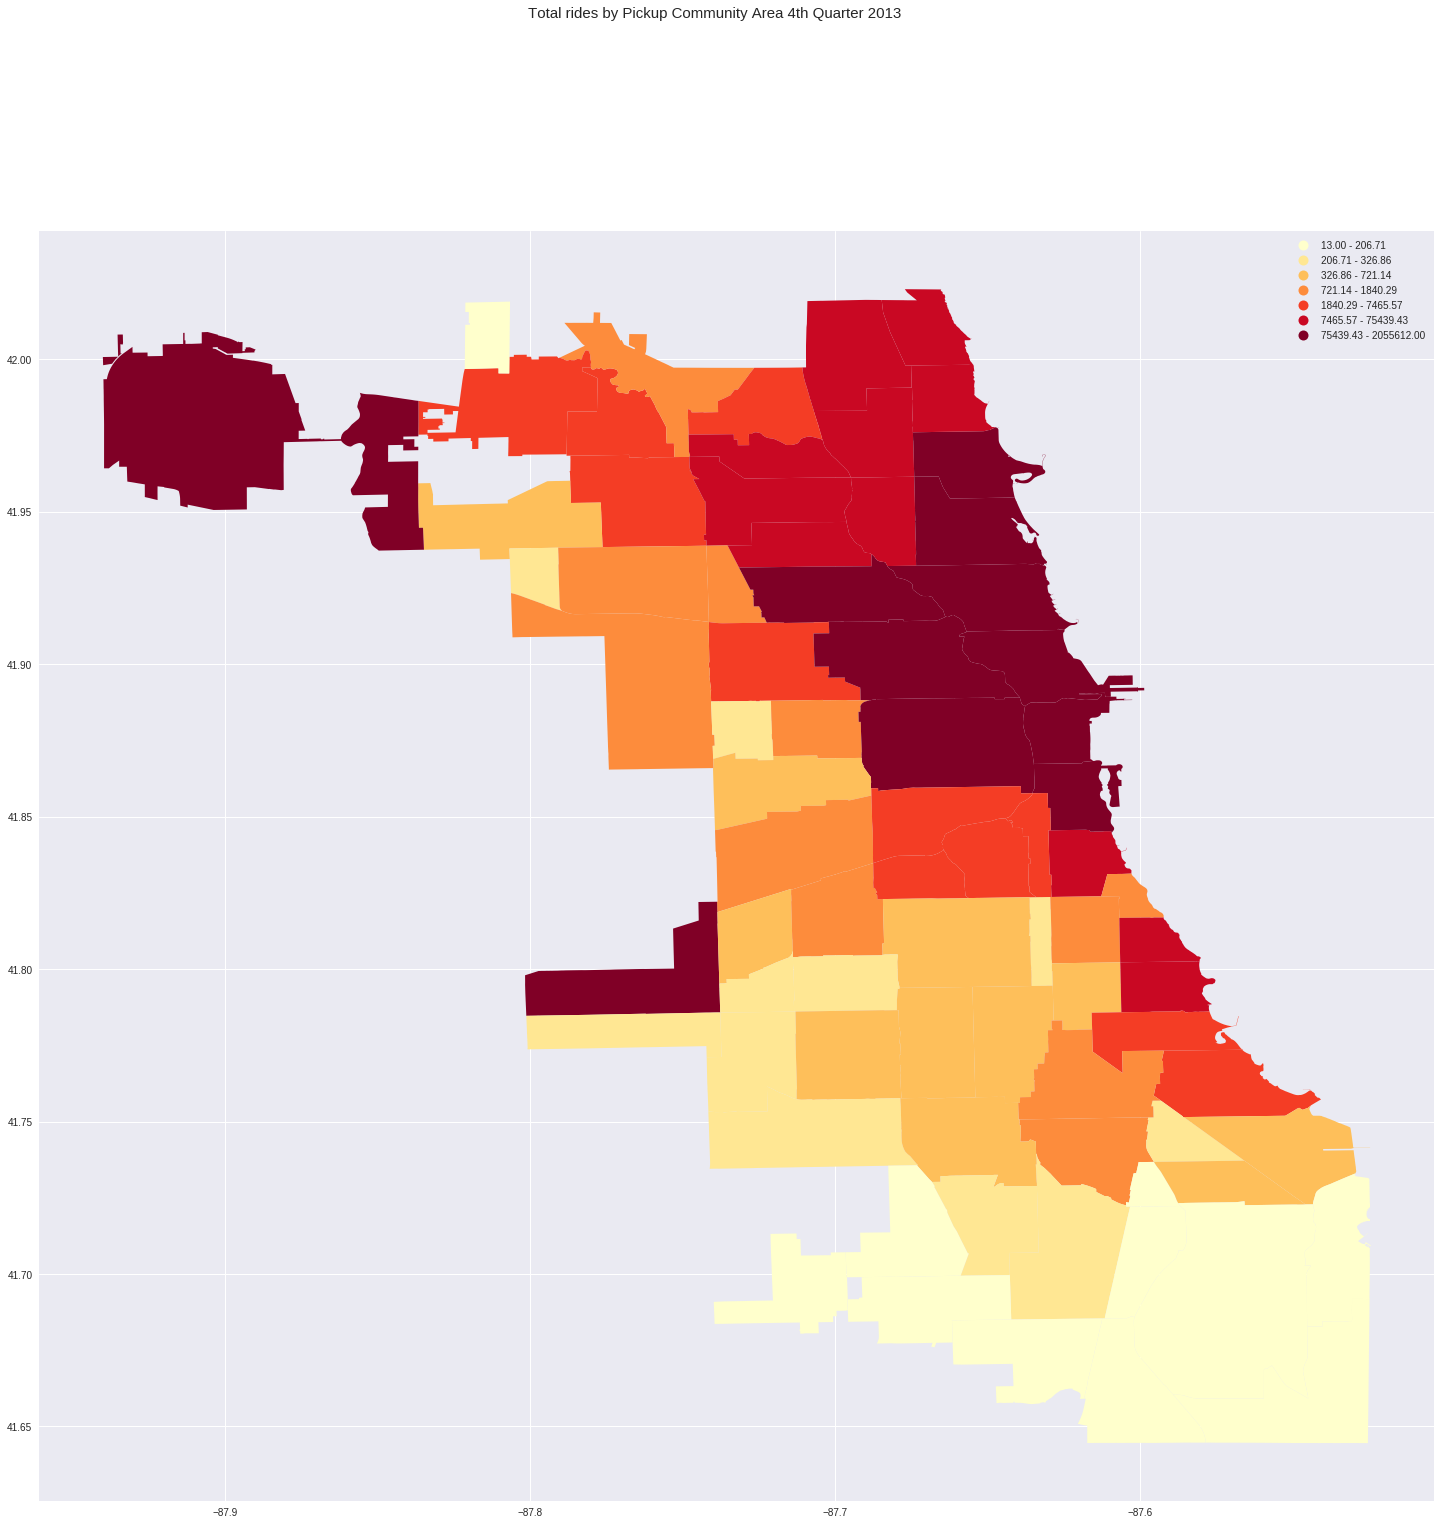

In [0]:
pickup_merge.plot(column='count', scheme='QUANTILES', k=7, cmap='YlOrRd', legend=True)
plt.suptitle('Total rides by Pickup Community Area 4th Quarter 2013', size=15)
mpl.rcParams['figure.figsize'] = (50,50)
#params = {'legend.fontsize': 15, legend.loc :'best' }#'legend.handlelength': 2}
#plt.rcParams.update(params)
plt.savefig('Q4_2013.png', dpi =100)

In [0]:
from google.colab import files
files.download( "Q4_2013.png" )

In [0]:
from google.colab import files
files.download( "Q2_2013.png" )

In [0]:
from google.colab import files
files.download( "Q3_2013.png" )